## init

In [4]:
# import sys 
# sys.path.append('pyfiles/')

from pyfiles import (parametrics as par,
    complex as cplx,
    matrix as mat,
    vineyard as vin,
    input as inp,
    plot as ourplot
)

# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
import math
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.ndimage import gaussian_filter1d
from scipy.spatial import distance
from scipy.stats import qmc
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline

import csv
import string

# for polygon grid
from matplotlib.path import Path as mplPath

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

## this is the new, streamlined thing

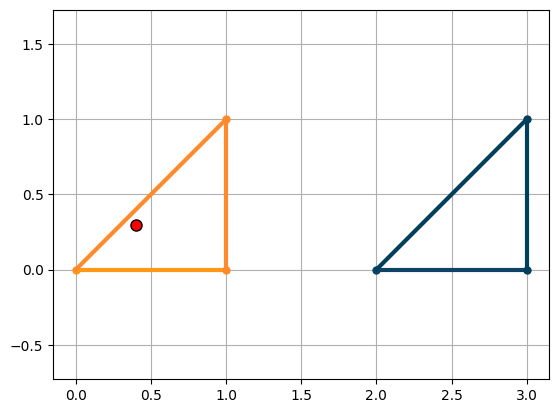

In [10]:
# read in .obj file
our_complex = inp.read_obj("input/two_triangles.obj")


# set the key point from which we measure radial dist
our_complex.key_point = (.4, .3)
# sort
distlist = cplx.augment_with_radialdist(our_complex)
our_complex.sort_by_dist(distlist)

# plot the complex with a heatmap from the key point
ourplot.plot_complex(our_complex)

matrix = mat.bdmatrix()
# matrix.initmatrix = np.array(
#             [
#                 [0, 1, 1, 1, 0, 0, 0],
#                 [0, 0, 0, 0, 1, 0, 1],
#                 [0, 0, 0, 0, 1, 1, 0],
#                 [0, 0, 0, 0, 0, 1, 1],
#                 [0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0],
#             ]
#         )
matrix.make_matrix(our_complex)


In [12]:


import pandas as pd
from IPython.display import display_html

def highlight_cells(val):
        color = "#FF0044" if val == 1 else ""
        style = "display:inline"
        return "background-color: {}".format(color)

cell_hover = {  # for row hover use <tr> instead of <td>
            "selector": "td:hover",
            "props": [("background-color", "#ffffb3")],
        }

dfstyles = []
def call_at_every_step(sparse, indices, old_j):
    df_styler = (
        pd.DataFrame(mat.sparse2array(sparse, matrix.initmatrix.shape[0]))
        .style.applymap(highlight_cells)
        .set_table_styles([cell_hover], "columns")
        .set_table_attributes("style='display:inline'")
        .set_caption(
         f'column {indices[1]} added to column {indices[0]}'
        )
        ._repr_html_()
    )
    dfstyles.append(df_styler)


stylestring = (
            pd.DataFrame(matrix.initmatrix)
            .style.applymap(highlight_cells)
            .set_table_styles([cell_hover], "columns")
            .set_table_attributes("style='display:inline'")
            .set_caption("Initial matrix")
            ._repr_html_()
        )


print(np.array2string(matrix.initmatrix))
reduced = matrix.reduce(every_step=call_at_every_step)
print(np.array2string(reduced))


for style in dfstyles:
    stylestring = stylestring + style
display_html(stylestring, raw=True)

[[0 1 1 0 1 0 0 1 1 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,1,0,1,0,0,1,1,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,1
8,0,0,0,0,0,0,0,0,0,1,0,1,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0
